In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\HP\SHUBHAM PYTHON\ElectricCarData_Clean.csv')
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [4]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


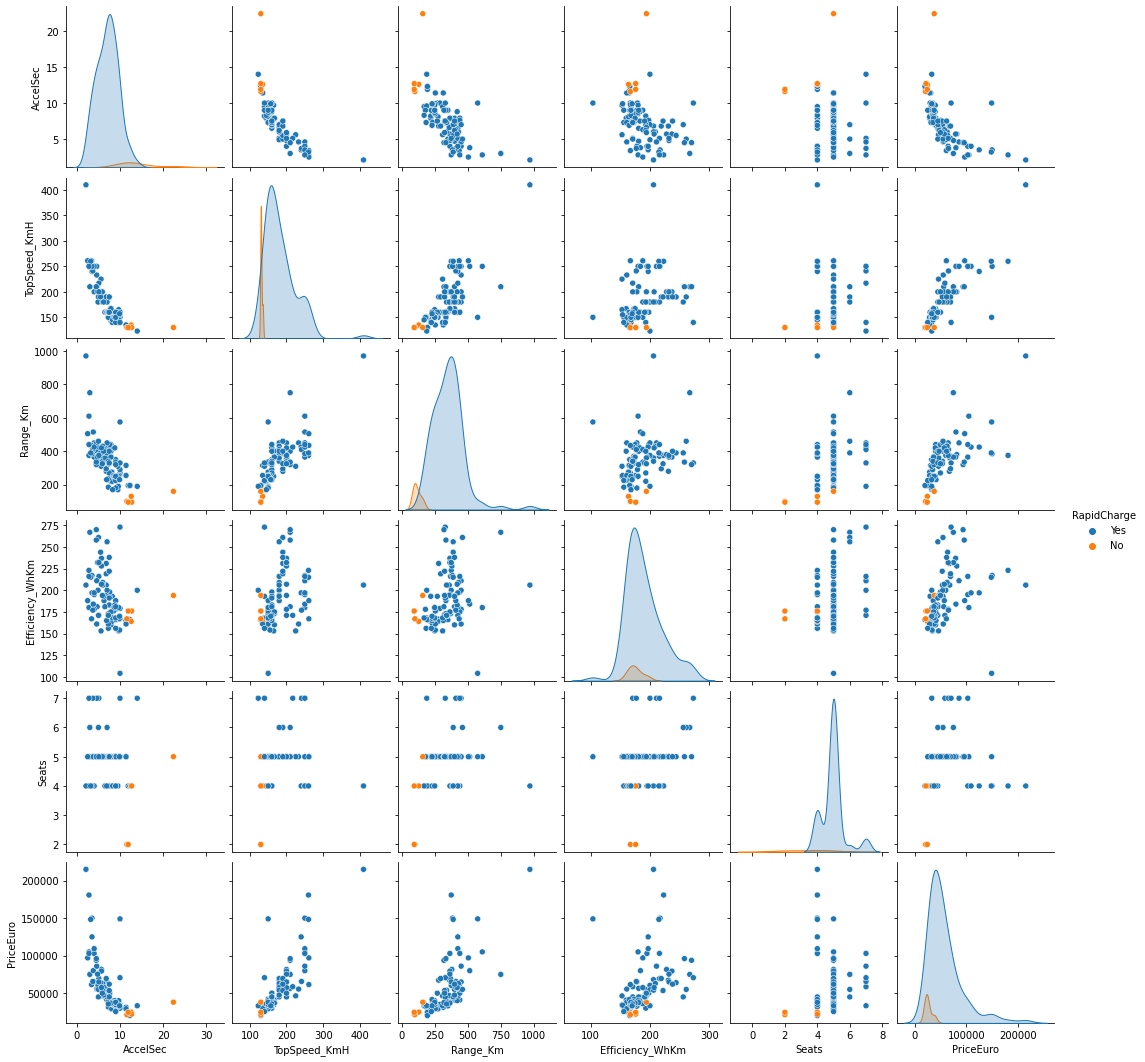

In [6]:
sns.pairplot(df,hue='RapidCharge')

<AxesSubplot:>

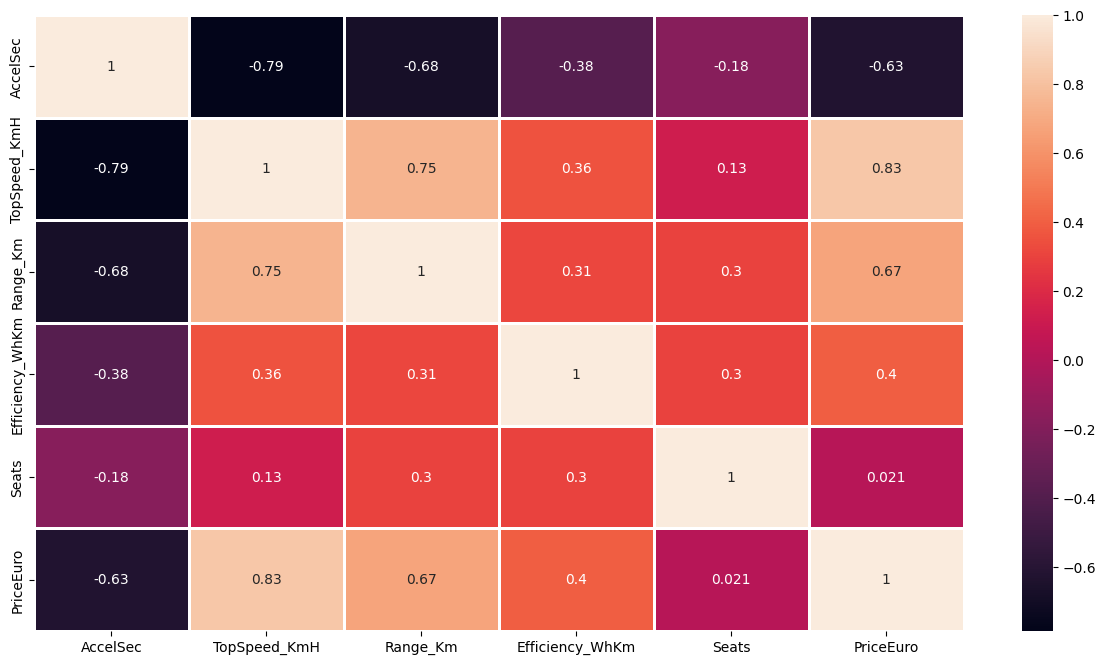

In [7]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

# Finding out Number of EV models for different companies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


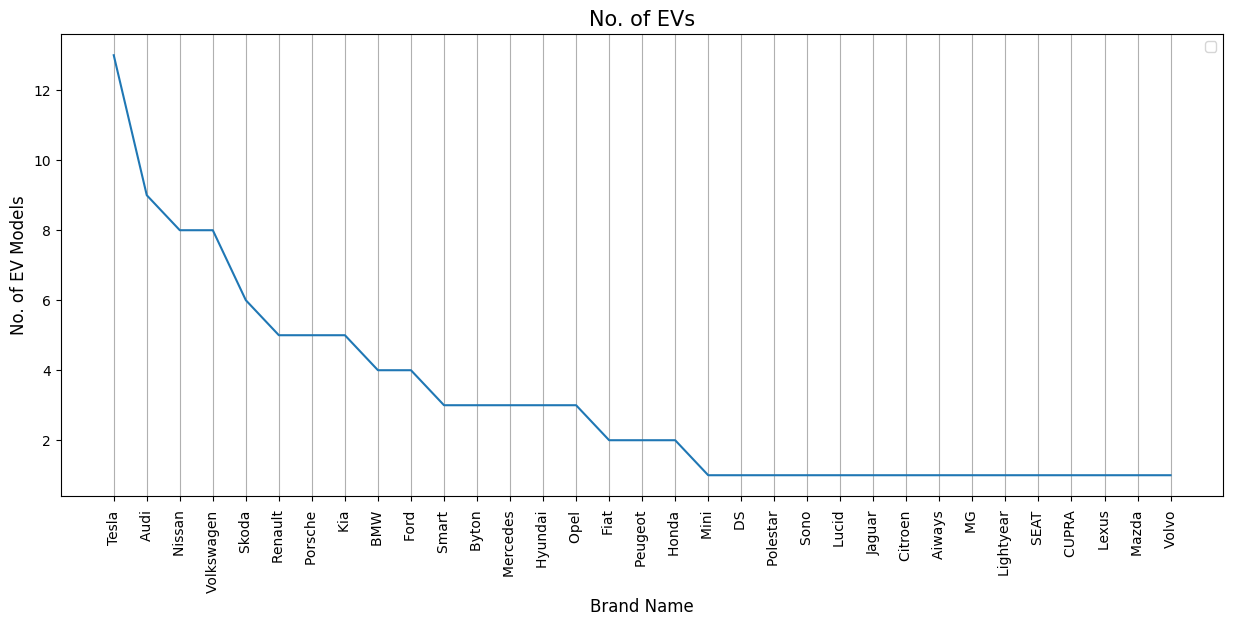

In [8]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

Here we can say that Tesla, Audi, Nissan, Volkswagen have more EV models compared to other company vehicles

# Top Speed and Range filtration

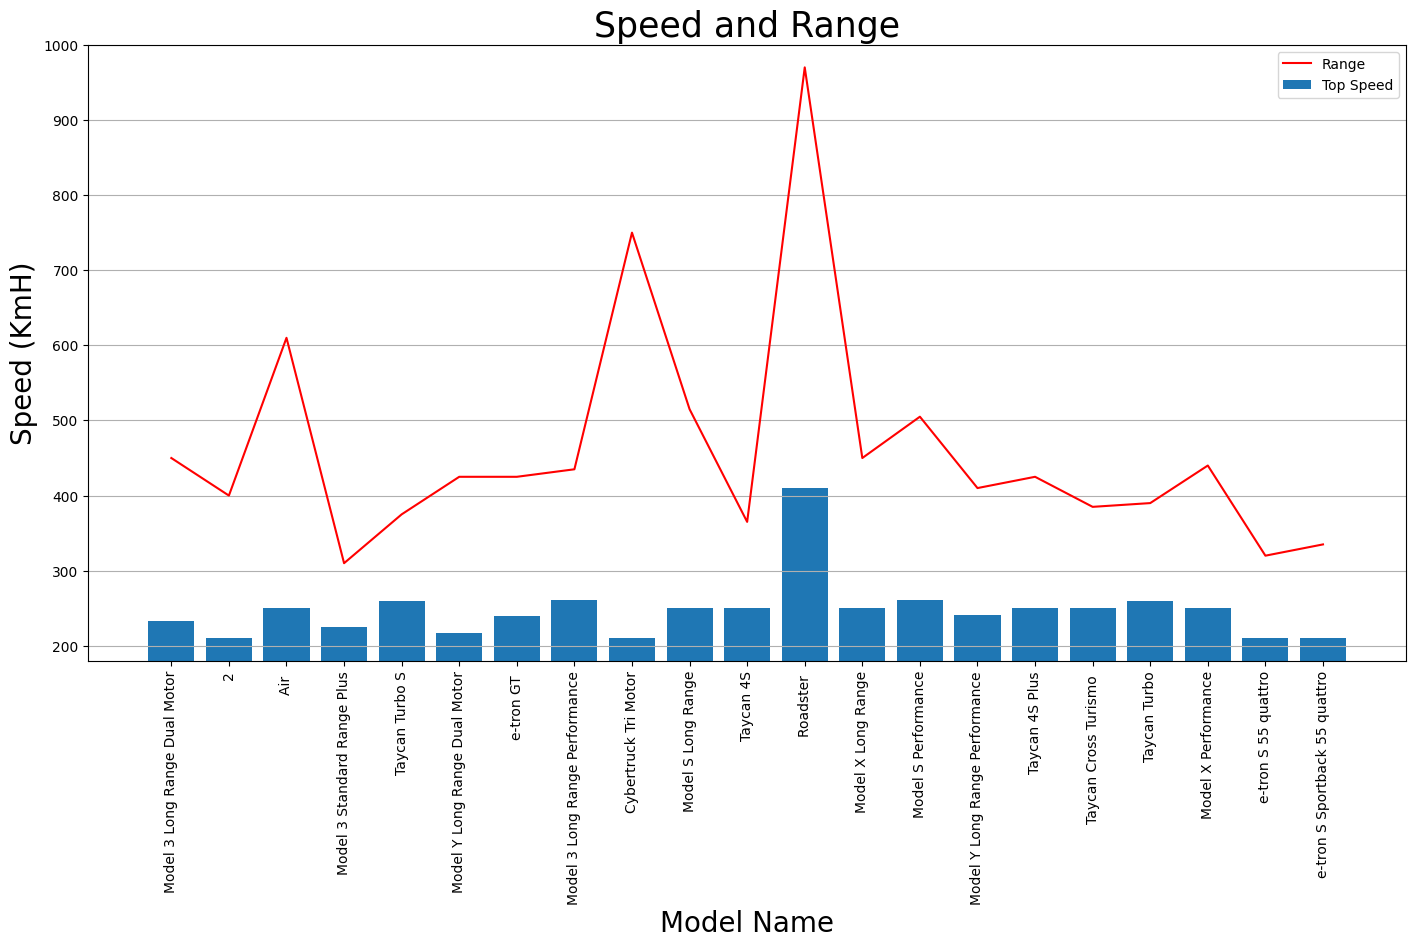

In [9]:
# Top Speed and Range filtration
df2 = df[df['TopSpeed_KmH']>200] # speed more than 200KmH

plt.figure(figsize=(17,8))
plt.title("Speed and Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=180,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Speed (KmH)",fontsize=20)
plt.bar(df2['Model'],df2['TopSpeed_KmH'],label='Top Speed') # Bar graph showing Top Speed
plt.plot(df2['Model'],df2['Range_Km'],label='Range',c='r') # Line graph showing Range of vehicle
plt.legend()

Maximum EV models have speed range more than 200 kmph

# Filteration of models realted to range

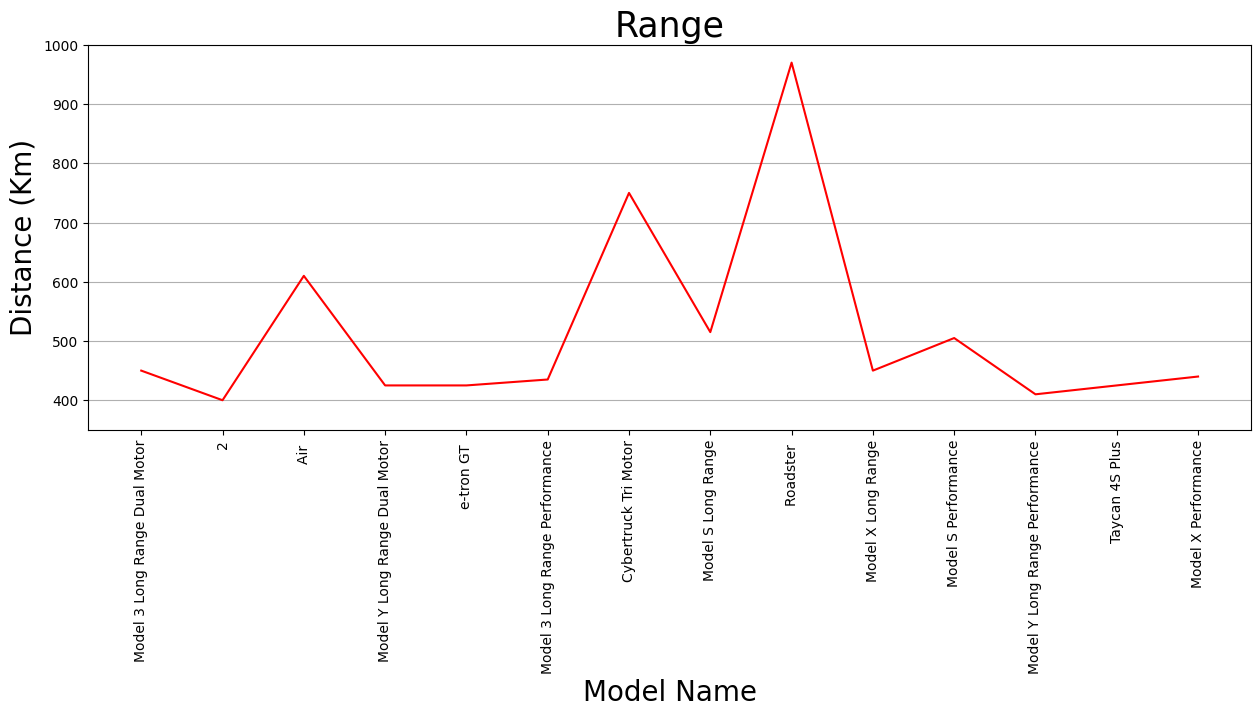

In [10]:

df3 = df2[df2['Range_Km']>=400] # Range above 400 km

plt.figure(figsize=(15,5))
plt.title("Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=350,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Distance (Km)",fontsize=20)
plt.plot(df3['Model'],df3['Range_Km'],label='Range',c='r')

Models having range higher than 400Km with speed above 200KmH

# Filteration according to Price Range

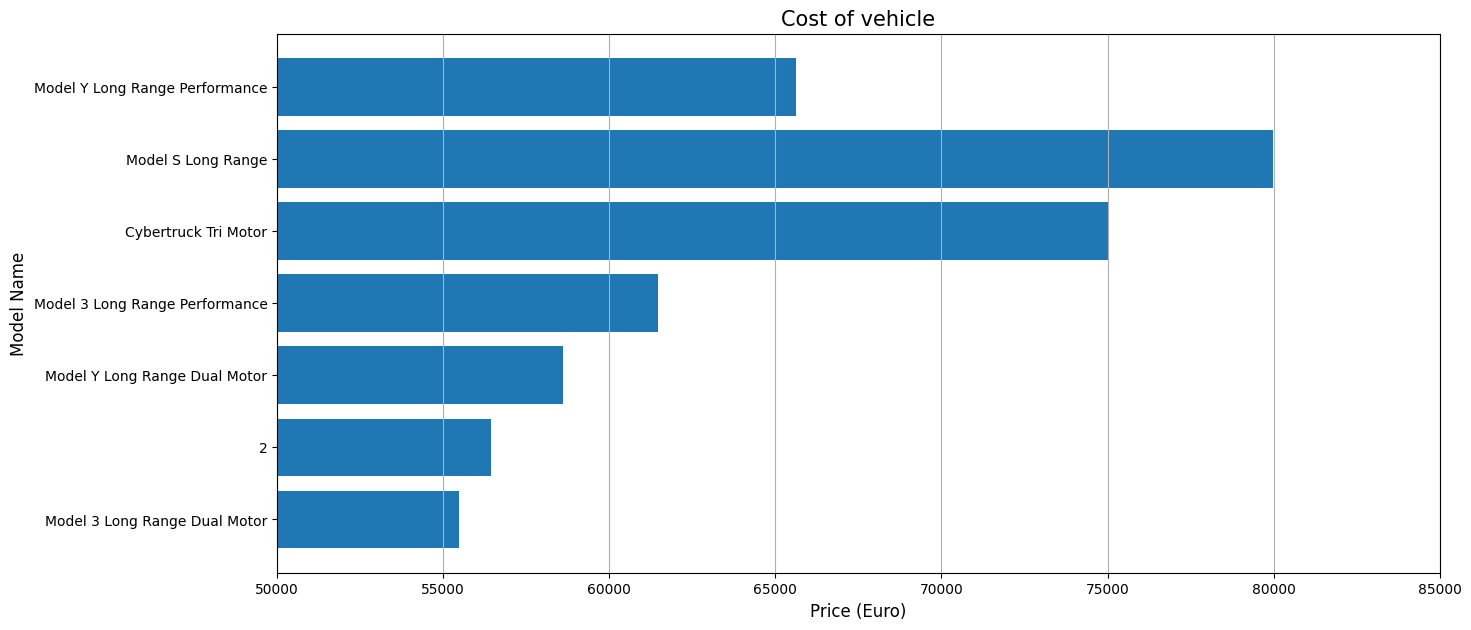

In [11]:
df4 = df3[df3['PriceEuro']>50000] 
df5 =df4[df4['PriceEuro']<80000] 

plt.figure(figsize=(15,7))
plt.title("Cost of vehicle",fontsize=15)
plt.xticks(rotation = 0)
plt.grid(axis='x')
plt.xlim(50000,85000)
plt.ylabel("Model Name",fontsize=12)
plt.xlabel("Price (Euro)",fontsize=12)
plt.barh(df5['Model'],df5['PriceEuro'],label='Range')
plt.show()

This shows the top speed of around more than 400KmH is the Roadster which is from tesla and other models that are quiet good in top speed

In [12]:
df5.style.hide_index()

Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Tesla,Model 3 Long Range Dual Motor,4.600000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
Polestar,2,4.700000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
Tesla,Model Y Long Range Dual Motor,5.100000,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
Tesla,Model 3 Long Range Performance,3.400000,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
Tesla,Cybertruck Tri Motor,3.000000,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
Tesla,Model S Long Range,3.800000,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
Tesla,Model Y Long Range Performance,3.700000,241,410,177,900,Yes,AWD,Type 2 CCS,SUV,D,7,65620


Tesla seems like a good value for money as it performs consistantly on the Top 3 and costs significantly less than brands such as Lightyear and Porsche.